## Import Library

In [1]:
# LIBRARY
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import os
import random
import tqdm

from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
from keras.utils import *
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score, roc_auc_score, multilabel_confusion_matrix, roc_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

from skorch import NeuralNetBinaryClassifier
from scipy.sparse import issparse
from skmultilearn.problem_transform import ClassifierChain, BinaryRelevance, LabelPowerset
from skmultilearn.ext import Keras

## Read Data

In [2]:
data = pd.read_csv('Final_dataset_Diabetes_Complication.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604078 entries, 0 to 604077
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   X1      604078 non-null  int64
 1   X2      604078 non-null  int64
 2   X3      604078 non-null  int64
 3   X4      604078 non-null  int64
 4   X5      604078 non-null  int64
 5   X6      604078 non-null  int64
 6   X7      604078 non-null  int64
 7   X8      604078 non-null  int64
 8   X9      604078 non-null  int64
 9   X10     604078 non-null  int64
 10  X11     604078 non-null  int64
 11  X12     604078 non-null  int64
 12  X13     604078 non-null  int64
 13  X14     604078 non-null  int64
 14  X15     604078 non-null  int64
 15  X16     604078 non-null  int64
 16  X17     604078 non-null  int64
 17  X18     604078 non-null  int64
 18  X19     604078 non-null  int64
 19  X20     604078 non-null  int64
 20  X21     604078 non-null  int64
 21  X22     604078 non-null  int64
 22  X23     604078 non-n

In [4]:
data.eq(0).any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
X24    False
X25    False
X26    False
Y1     False
Y2     False
Y3     False
Y4     False
Y5     False
Y6     False
Y7     False
dtype: bool

## Data Visualization

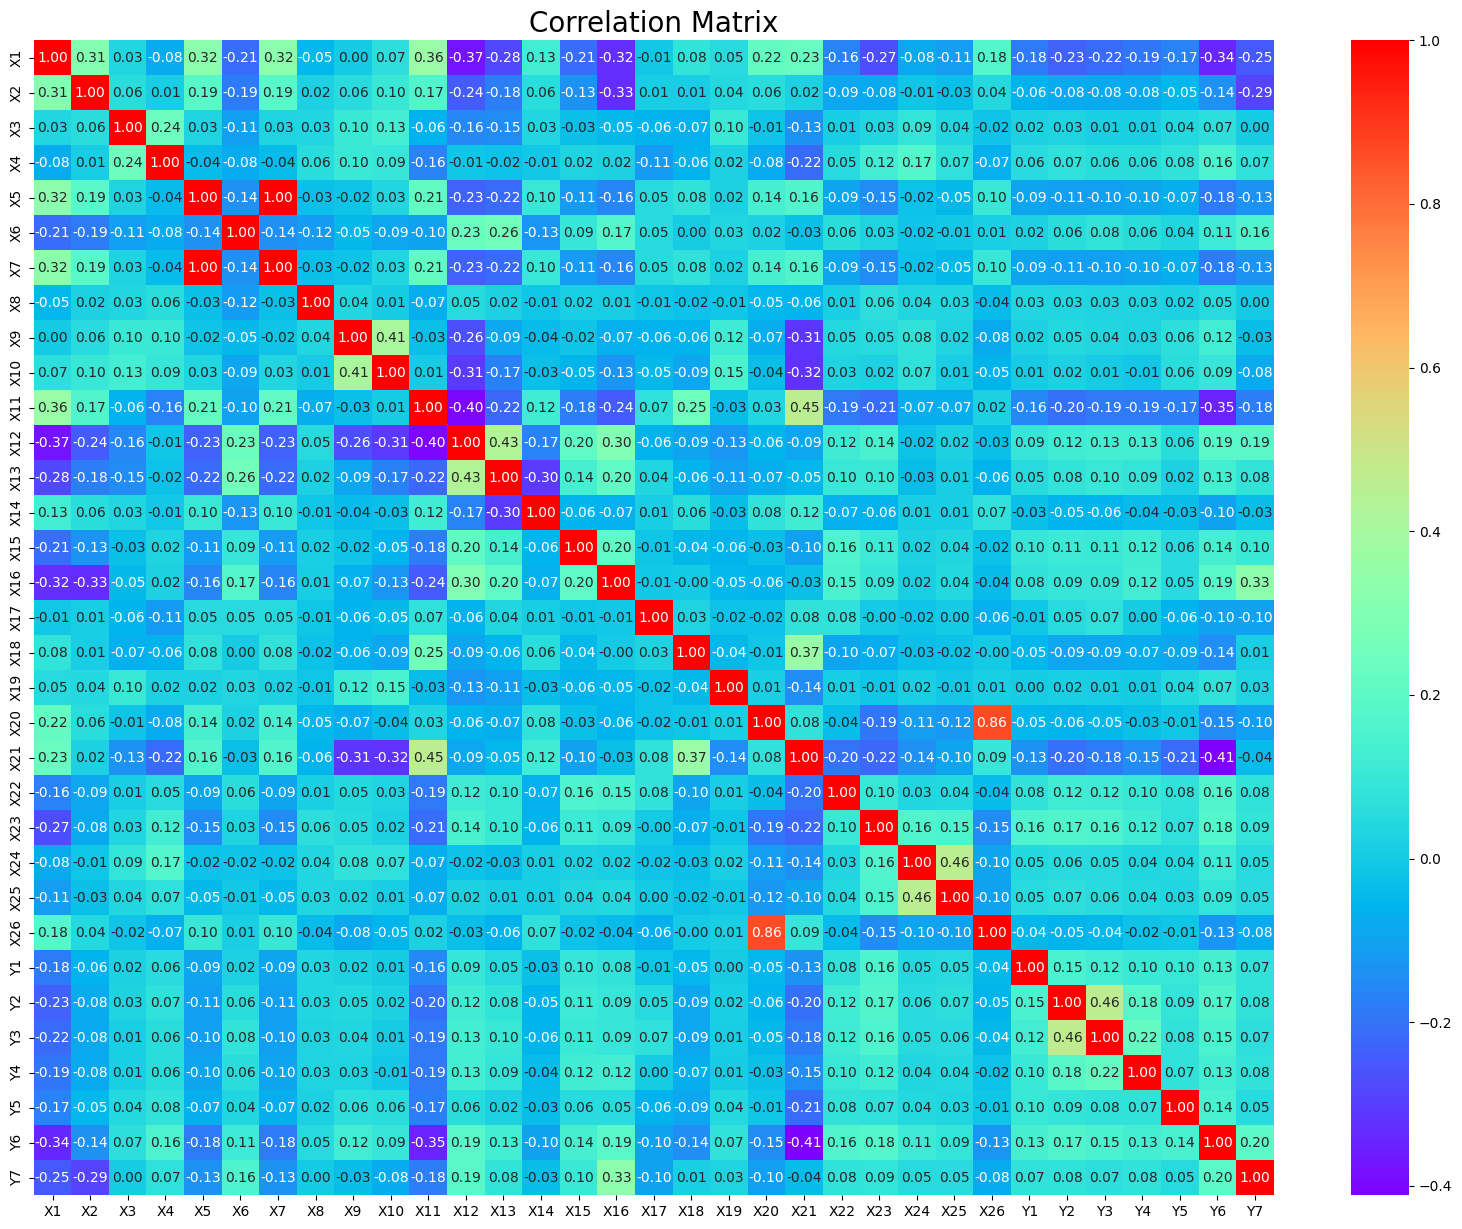

In [5]:
f, ax = plt.subplots(figsize= [20,15])
corr = data.corr()
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "rainbow" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [7]:
data_feature = data.iloc[:, :26]
data_label = data.iloc[:, 26:]
data_label

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2,2,1,2,2,1,2
1,2,2,2,2,2,1,1
2,2,2,2,2,2,2,1
3,2,2,2,1,2,1,2
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
604073,2,2,2,2,2,2,2
604074,2,2,1,2,2,2,1
604075,2,2,2,2,2,2,1
604076,2,2,2,2,1,2,2


In [28]:
import multilabel_oversampling as mo

mo.seed_everything(20)
ml_oversampler = mo.MultilabelOversampler(number_of_adds=180000, number_of_tries=100)
df_new = ml_oversampler.fit(data, target_list=['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7'])

Start the upsampling process.


Iteration:   0%|          | 503/180000 [09:18<55:24:36,  1.11s/it] 

Iter 503: No improvement after 100 tries.
Sampling done.

Dataset size original: 604078; Upsampled dataset size: 604581
Original target distribution:  {'Y1': 1181831, 'Y2': 1172620, 'Y3': 1175206, 'Y4': 1180491, 'Y5': 1152575, 'Y6': 989497, 'Y7': 964896}
Upsampled target distribution: {'Y1': 1182746, 'Y2': 1173479, 'Y3': 1176056, 'Y4': 1181372, 'Y5': 1153331, 'Y6': 990453, 'Y7': 965884}


In [29]:
type(df_new)
df_temp = df_new

In [30]:
df_temp.reset_index(inplace = True, drop = True)
df_temp

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604576,3,1,1,1,1,3,1,1,1,1,...,1,2,2,1,2,2,2,2,2,2
604577,2,1,1,1,1,3,1,2,5,1,...,1,2,1,2,2,2,2,1,2,2
604578,3,1,1,1,1,3,1,2,1,1,...,1,2,2,2,2,2,1,2,2,2
604579,3,1,1,1,1,4,1,1,3,1,...,1,2,1,2,2,2,2,1,2,2


In [31]:
data_feature2 = df_temp.iloc[:, :26]
data_label2 = df_temp.iloc[:, 26:]
data_label2

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2,2,1,2,2,1,2
1,2,2,2,2,2,1,1
2,2,2,2,2,2,2,1
3,2,2,2,1,2,1,2
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
604576,1,2,2,2,2,2,2
604577,2,2,2,2,1,2,2
604578,2,2,2,1,2,2,2
604579,2,2,2,2,1,2,2


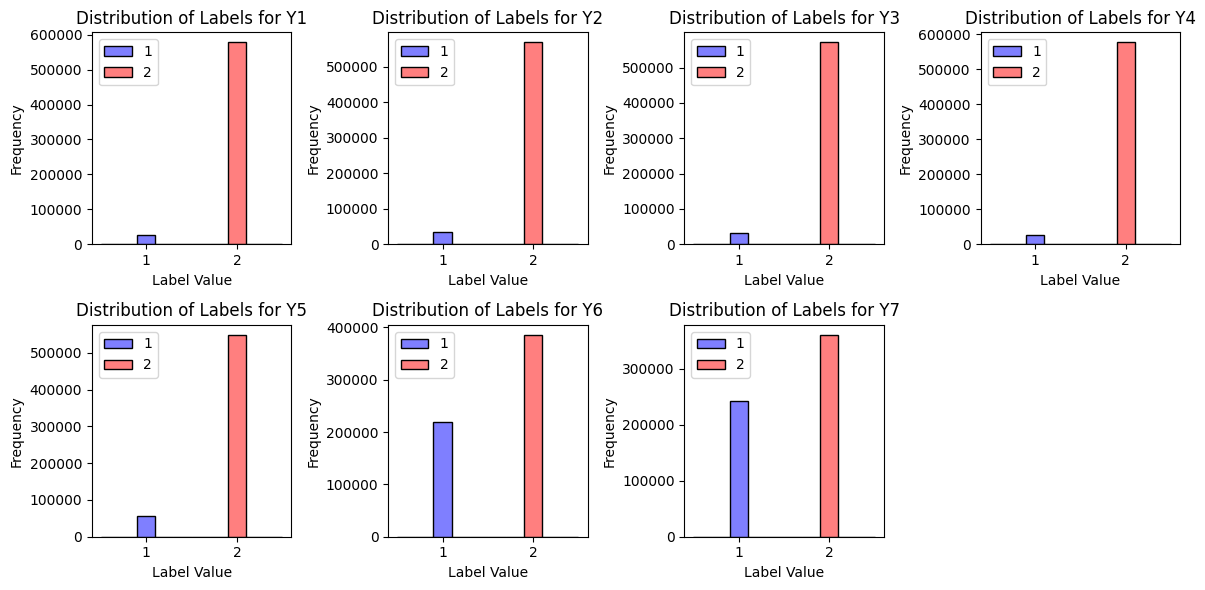

In [32]:
num_rows = 2  # Adjust as needed
num_cols = 4  # Adjust as needed

# Loop through each label column and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
for i, label in enumerate(data_label.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    # Filter values 1 and 2 from the label column
    values_1 = data_label[label][data_label[label] == 1]
    values_2 = data_label[label][data_label[label] == 2]

    # Create a histogram or bar plot on the current subplot
    sns.histplot(values_1, bins=5, color='blue', alpha=0.5, label='1', ax=ax)
    sns.histplot(values_2, bins=5, color='red', alpha=0.5, label='2', ax=ax)

    ax.set_title(f'Distribution of Labels for {label}')
    ax.set_xlabel('Label Value')
    ax.set_ylabel('Frequency')
    ax.legend()

if 7 < num_rows * num_cols:
    for j in range(7, num_rows * num_cols):
        fig.delaxes(axes.ravel()[j])

# Ensure tight layout to avoid overlapping
plt.tight_layout()
plt.show()

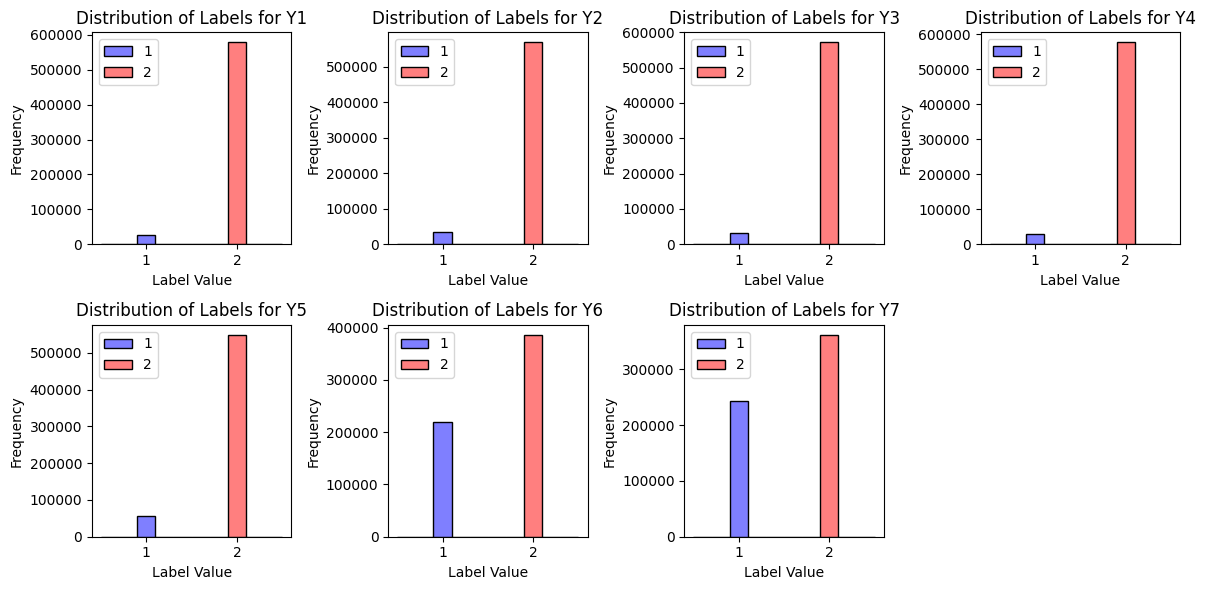

In [33]:
num_rows = 2  # Adjust as needed
num_cols = 4  # Adjust as needed

# Loop through each label column and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
for i, label in enumerate(data_label2.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    # Filter values 1 and 2 from the label column
    values_1 = data_label2[label][data_label2[label] == 1]
    values_2 = data_label2[label][data_label2[label] == 2]

    # Create a histogram or bar plot on the current subplot
    sns.histplot(values_1, bins=5, color='blue', alpha=0.5, label='1', ax=ax)
    sns.histplot(values_2, bins=5, color='red', alpha=0.5, label='2', ax=ax)

    ax.set_title(f'Distribution of Labels for {label}')
    ax.set_xlabel('Label Value')
    ax.set_ylabel('Frequency')
    ax.legend()

if 7 < num_rows * num_cols:
    for j in range(7, num_rows * num_cols):
        fig.delaxes(axes.ravel()[j])

# Ensure tight layout to avoid overlapping
plt.tight_layout()
plt.show()

## Data Preprocessing

In [107]:
x = data.iloc[:, :26].values
y = data.iloc[:, 26:].values-1

In [108]:
scaler = MinMaxScaler()
scaler.fit(x)
X = scaler.transform(x)
X

array([[0.5 , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 0.5 , 1.  ],
       [0.75, 0.  , 0.  , ..., 1.  , 1.  , 0.  ],
       ...,
       [0.  , 0.5 , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.5 , 0.  , 1.  , ..., 0.  , 1.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 1.  ]])

In [109]:
scaler.fit(y)
Y = scaler.transform(y)
Y

array([[1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [110]:
print(x.shape, y.shape)

(604078, 26) (604078, 7)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Modelling

### Variational Dense

In [112]:
class VariationalDense:
    """Variational Dense Layer Class"""
    def __init__(self, n_in, n_out, model_prob, model_lam):
        self.model_prob = model_prob
        self.model_lam = model_lam
        self.model_bern = Bernoulli(probs=self.model_prob, dtype=tf.float32)
        self.model_M = tf.Variable(tf.truncated_normal([n_in, n_out], stddev=0.01))
        self.model_m = tf.Variable(tf.zeros([n_out]))
        self.model_W = tf.matmul(
            tf.diag(self.model_bern.sample((n_in, ))), self.model_M
        )

    def __call__(self, X, activation=tf.identity):
        output = activation(tf.matmul(X, self.model_W) + self.model_m)
        if self.model_M.shape[1] == 1:
            output = tf.squeeze(output)
        return output

    @property
    def regularization(self):
        return self.model_lam * (
            self.model_prob * tf.reduce_sum(tf.square(self.model_M)) +
            tf.reduce_sum(tf.square(self.model_m))
        )

### Advanced Dropout

In [1]:
class AdvancedDropout(tf.keras.layers.Layer):
    def __init__(self, num, init_mu=0, init_sigma=1.2, reduction=16, **kwargs):
        super(AdvancedDropout, self).__init__(**kwargs)

        self.num = num
        self.init_mu = init_mu
        self.init_sigma = init_sigma
        self.reduction = reduction

        # Initialize parameters
        self.weight_h = tf.Variable(tf.random.normal([num // reduction, num]), name='weight_h')
        self.bias_h = tf.Variable(tf.random.normal([1]), name='bias_h')

        self.weight_mu = tf.Variable(tf.random.normal([1, num // reduction]), name='weight_mu')
        self.bias_mu = tf.Variable(tf.ones([1]), name='bias_mu')

        self.weight_sigma = tf.Variable(tf.random.normal([1, num // reduction]), name='weight_sigma')
        self.bias_sigma = tf.Variable(tf.ones([1]), name='bias_sigma')

    def call(self, inputs):
        if getattr(self, 'is_training', False):
            # Training mode
            # Parameterized prior
            h = tf.matmul(inputs, self.weight_h) + self.bias_h

            mu = tf.reduce_mean(tf.matmul(h, self.weight_mu) + self.bias_mu)
            sigma = tf.reduce_mean(tf.nn.softplus(tf.matmul(h, self.weight_sigma) + self.bias_sigma))

            # Mask
            epsilon = mu + sigma * tf.random.normal(tf.shape(inputs))
            mask = tf.math.sigmoid(epsilon)

            # Output
            out = inputs * mask / tf.math.sigmoid(mu / tf.sqrt(1. + 3.14 / 8. * tf.square(sigma)))
        else:
            # Inference mode
            out = inputs

        return out

NameError: name 'tf' is not defined

In [114]:
def DNNModelwithAdvanceDropout(n_inputs, n_outputs):
	model = Sequential()
	model.add(AdvancedDropout(n_inputs))
	model.add(Dense(26, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_focal_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

### Weighted Dropout

In [115]:
class WeightedDropout(Layer):
    def __init__(self, rate=0.5):
        super(WeightedDropout, self).__init__()
        self.rate = rate

    def call(self, inputs, training=None):
        if training is None:
            training = tf.keras.backend.learning_phase()

        def dropout():
            return tf.keras.backend.dropout(inputs, level=self.rate)

        def weighted_dropout():
            mask = tf.keras.backend.random_uniform(shape=tf.shape(inputs), minval=0, maxval=1) > self.rate
            return inputs * tf.cast(mask, dtype=inputs.dtype)

        return tf.keras.backend.in_train_phase(dropout, weighted_dropout, training=training)


In [116]:
class WeightedGaussianDropout(Layer):
    def __init__(self, mean, stddev, **kwargs):
        super(WeightedGaussianDropout, self).__init__(**kwargs)
        self.mean = mean
        self.stddev = stddev

    def call(self, inputs, training=None):
        if training is None:
            training = tf.keras.backend.learning_phase()

        def dropout():
            shape = tf.shape(inputs)
            gaussian_dropout = tf.random.normal(shape, mean=self.mean, stddev=self.stddev)
            return inputs * gaussian_dropout

        return tf.keras.backend.in_train_phase(dropout, inputs, training=training)


In [117]:
def DNNModelwithWeightedDropout(n_inputs, n_outputs):
    inputLayer = Input(shape=(n_inputs,))
    num_split = 10
    x = Dense(num_split, activation='relu')(inputLayer)
    split = tf.split(x, num_or_size_splits=num_split, axis=-1)
    dropout_rate = 0.5
    # dropout_output = [WeightedDropout(dropout_rate)(channel) for channel in split]
    dropout_output = [WeightedGaussianDropout(mean=0.5, stddev=0.9)(channel) for channel in split]
    concat = tf.concat(dropout_output, axis=-1)
    x = Dense(32, activation='relu')(concat)
    out = Dense(n_outputs, activation='sigmoid')(x)
    model = Model(inputs=inputLayer, outputs=out)
    model.compile(loss='binary_focal_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### Multi Sample Dropout

In [118]:
def DNNModelwithMultiSampleDropout(n_inputs, n_outputs, num=2):
    inp = Input(shape=(n_inputs,))
    out = Dense(32, activation='relu')(inp)
    
    dense = []
    FC = Dense(32, activation='relu')
    for p in np.linspace(0.1,0.5, num):
        x = Dropout(p)(out)
        x = FC(x)
        x = Dense(n_outputs, activation='sigmoid')(x)
        dense.append(x)
    
    out = Average()(dense)
    model = Model(inp, out)
    model.compile(loss='binary_focal_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

### Standard Model

In [119]:
def DNNModel(n_inputs, n_outputs):
	model = Sequential()
	model.add(InputLayer(input_shape = n_inputs))
	model.add(Dense(32, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(32, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_focal_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [120]:
def MLPModel(in_dim, out_dim, hid_dim):
    model = Sequential([
        tf.keras.layers.Input(shape=in_dim),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hid_dim, activation='relu'),
        tf.keras.layers.Dense(out_dim, activation='sigmoid')
    ])
    model.compile(loss='binary_focal_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Training

In [121]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [122]:
ednn = DNNModelwithAdvanceDropout(26, 7)
wdnn = DNNModelwithWeightedDropout(26, 7)
mdnn = DNNModelwithMultiSampleDropout(26, 7)
dnn = DNNModel(26, 7)
mlp = MLPModel(26, 7, 16)
rf = RandomForestClassifier(n_estimators = 100)
dt = DecisionTreeClassifier()
svm = LinearSVC(random_state=1)
nb = GaussianNB()

In [123]:
def callback(model_name):
    checkpoint_path = "checkpoint/"+model_name+"/ck1.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    cp_callback = [ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1), EarlyStopping(patience=3, monitor='loss')]
    return cp_callback

In [124]:
def train_classifier(classifier, X_train, y_train):
    multilabel_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
    multilabel_classifier = multilabel_classifier.fit(X_train, y_train)
    return multilabel_classifier

In [125]:
def train(model, X_train, y_train, epoch, model_name):
    cp_callback = callback(model_name)
    start = time.time()
    model.fit(X_train, y_train, verbose=1, epochs=epoch, callbacks=cp_callback, batch_size=32)
    training_time = time.time() - start
    print(training_time)

### Weighted Dropout

In [98]:
train(wdnn, X_train, y_train, 10, 'wdnn')

Epoch 1/10
15098/15102 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.3122
Epoch 1: saving model to checkpoint/wdnn\ck1.ckpt
15102/15102 [==============================] - 54s 4ms/step - loss: 0.0803 - accuracy: 0.3122
Epoch 2/10
15098/15102 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.2991
Epoch 2: saving model to checkpoint/wdnn\ck1.ckpt
15102/15102 [==============================] - 54s 4ms/step - loss: 0.0782 - accuracy: 0.2991
Epoch 3/10
15102/15102 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.2894
Epoch 3: saving model to checkpoint/wdnn\ck1.ckpt
15102/15102 [==============================] - 53s 4ms/step - loss: 0.0779 - accuracy: 0.2894
Epoch 4/10
15097/15102 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.2713
Epoch 4: saving model to checkpoint/wdnn\ck1.ckpt
15102/15102 [==============================] - 53s 4ms/step - loss: 0.0778 - accuracy: 0.2714
Epoch 5/10
15102/15102 [

In [68]:
y_pred = wdnn.predict(X_test)

yprob = y_pred
y_pred = y_pred.round()

3776/3776 [==============================] - 4s 936us/step


In [69]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], yprob[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.7837508601127998
0.83738787141584
0.829514566018799
0.8168511444317876
0.7477727778674708
0.8092787804096988
0.7354979797684846


In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
hamming_loss_score = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='micro')
auc_roc = roc_auc_score(y_test, y_pred)

In [73]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Hamming Loss:', hamming_loss_score)
print('Jaccard Score:', jaccard)
print('AUC-ROC:', auc_roc)

Accuracy: 0.2366739504701364
Precision: 0.9341924771314669
Recall: 0.8700467134125869
F1 Score: 0.9009793143645277
Hamming Loss: 0.16231293868361807
Jaccard Score: 0.8198019620018037
AUC-ROC: 0.5390139216310758


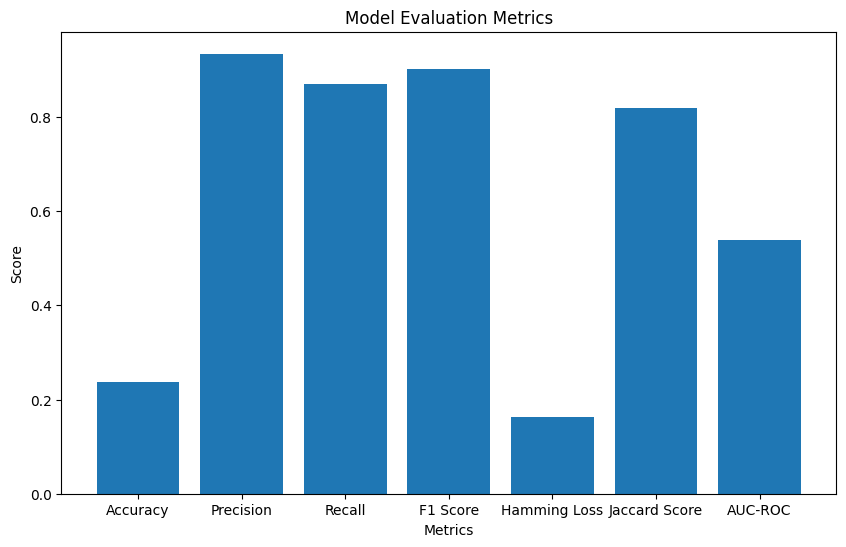

In [74]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Hamming Loss', 'Jaccard Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, hamming_loss_score, jaccard, auc_roc]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

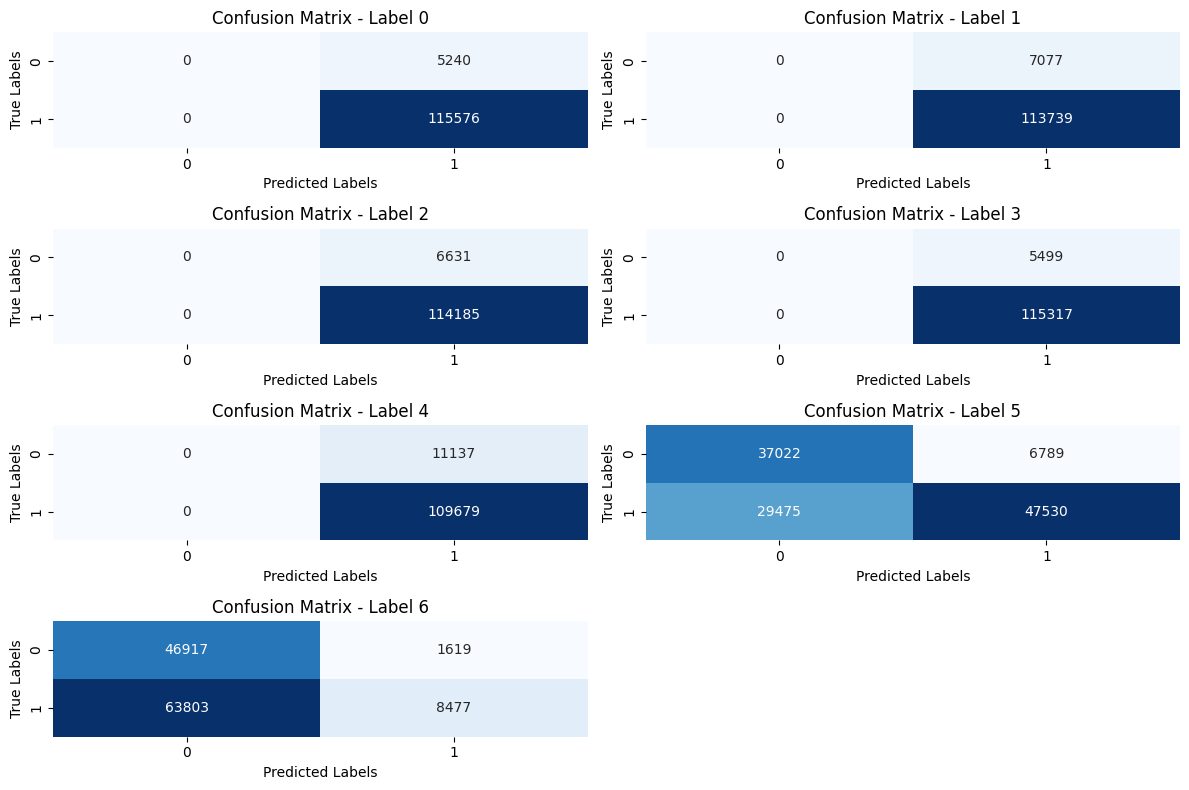

In [71]:
cm = multilabel_confusion_matrix(y_test, y_pred)

# Determine the grid dimensions for subplots
num_labels = cm.shape[0]
cols = min(num_labels, 2)
rows = (num_labels + cols - 1) // cols

# Plot confusion matrix
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (matrix, ax) in enumerate(zip(cm, axes.ravel())):
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Label {i}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Remove unused subplots if necessary
if num_labels < rows * cols:
    for j in range(num_labels, rows * cols):
        fig.delaxes(axes.ravel()[j])

plt.tight_layout()
plt.show()

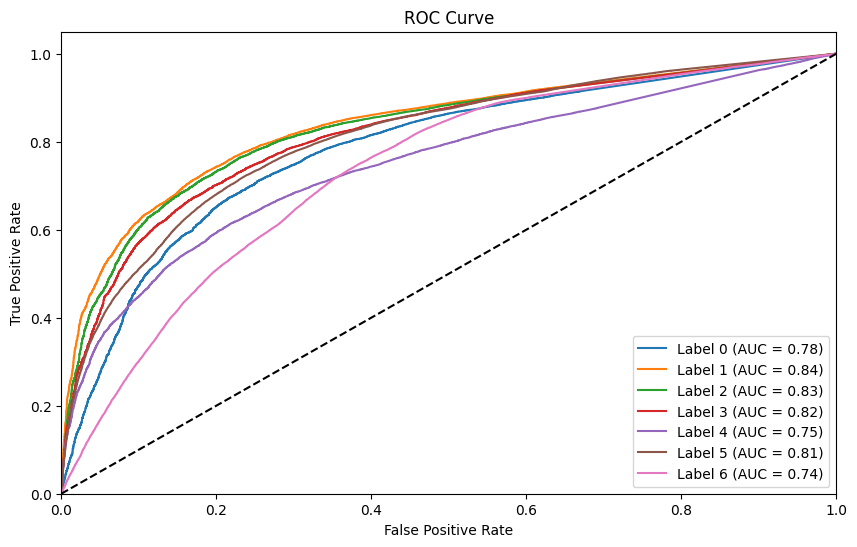

In [77]:
plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
#predictions=preds
for i in range(y.shape[1]):
    fpr, tpr, _ = metrics.roc_curve(y_test[:,i], yprob[:,i])
    roc_auc_per_label[i] = metrics.roc_auc_score(y_test[:,i], yprob[:,i])
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))
# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Advanced Dropout

In [63]:
train(ednn, X_train, y_train, 20, 'ednn')

Epoch 1/20
15100/15102 [============================>.] - ETA: 0s - loss: 0.2896 - accuracy: 0.2552
Epoch 1: saving model to checkpoint/ednn\ck1.ckpt
15102/15102 [==============================] - 37s 2ms/step - loss: 0.2896 - accuracy: 0.2552
Epoch 2/20
15097/15102 [============================>.] - ETA: 0s - loss: 0.2847 - accuracy: 0.2432
Epoch 2: saving model to checkpoint/ednn\ck1.ckpt
15102/15102 [==============================] - 37s 2ms/step - loss: 0.2847 - accuracy: 0.2433
Epoch 3/20
15102/15102 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.2439
Epoch 3: saving model to checkpoint/ednn\ck1.ckpt
15102/15102 [==============================] - 36s 2ms/step - loss: 0.2842 - accuracy: 0.2439
109.4500207901001


In [64]:
y_pred1 = ednn.predict(X_test)

yprob1 = y_pred1
y_pred1 = y_pred1.round()

3776/3776 [==============================] - 3s 797us/step


In [65]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], yprob1[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.8004856087227492
0.849617731722247
0.8453259386198889
0.8248177884565021
0.7653019585819467
0.8194126279638545
0.7528133506970083


### Multi Sample Dropout

In [126]:
train(mdnn, X_train, y_train, 10, 'mdnn')

Epoch 1/10
15093/15102 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.2357
Epoch 1: saving model to checkpoint/mdnn\ck1.ckpt
15102/15102 [==============================] - 49s 3ms/step - loss: 0.0765 - accuracy: 0.2357
Epoch 2/10
15092/15102 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.2484
Epoch 2: saving model to checkpoint/mdnn\ck1.ckpt
15102/15102 [==============================] - 47s 3ms/step - loss: 0.0755 - accuracy: 0.2485
Epoch 3/10
15101/15102 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.2575
Epoch 3: saving model to checkpoint/mdnn\ck1.ckpt
15102/15102 [==============================] - 48s 3ms/step - loss: 0.0753 - accuracy: 0.2575
Epoch 4/10
15097/15102 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.2548
Epoch 4: saving model to checkpoint/mdnn\ck1.ckpt
15102/15102 [==============================] - 48s 3ms/step - loss: 0.0752 - accuracy: 0.2548
Epoch 5/10
15090/15102 [

In [127]:
y_pred2 = mdnn.predict(X_test)

yprob2 = y_pred2
y_pred2 = y_pred2.round()

3776/3776 [==============================] - 4s 928us/step


In [128]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], yprob2[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.8030950661261458
0.8504249326851848
0.8457295292788789
0.8255323111857339
0.7662785569123027
0.8199321718284296
0.7570637315666352


### DNN

In [69]:
train(dnn, X_train, y_train, 20, 'dnn')

Epoch 1/20
15099/15102 [============================>.] - ETA: 0s - loss: 0.3007 - accuracy: 0.2917
Epoch 1: saving model to checkpoint/dnn\ck1.ckpt
15102/15102 [==============================] - 41s 3ms/step - loss: 0.3007 - accuracy: 0.2917
Epoch 2/20
15094/15102 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.2819
Epoch 2: saving model to checkpoint/dnn\ck1.ckpt
15102/15102 [==============================] - 41s 3ms/step - loss: 0.2936 - accuracy: 0.2820
Epoch 3/20
15091/15102 [============================>.] - ETA: 0s - loss: 0.2925 - accuracy: 0.2938
Epoch 3: saving model to checkpoint/dnn\ck1.ckpt
15102/15102 [==============================] - 41s 3ms/step - loss: 0.2925 - accuracy: 0.2939
Epoch 4/20
15092/15102 [============================>.] - ETA: 0s - loss: 0.2918 - accuracy: 0.2990
Epoch 4: saving model to checkpoint/dnn\ck1.ckpt
15102/15102 [==============================] - 41s 3ms/step - loss: 0.2918 - accuracy: 0.2989
Epoch 5/20
15085/15102 [====

In [70]:
y_pred3 = dnn.predict(X_test)

yprob3 = y_pred3
y_pred3 = y_pred3.round()

3776/3776 [==============================] - 3s 773us/step


In [71]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], yprob3[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.7933630648244676
0.8465623626330072
0.8415839960322294
0.8202537514406609
0.7530239425298092
0.8169680759941133
0.7472154696428983


### MLP

In [72]:
train(mlp, X_train, y_train, 20, 'mlp')

Epoch 1/20
15101/15102 [============================>.] - ETA: 0s - loss: 0.2904 - accuracy: 0.2390
Epoch 1: saving model to checkpoint/mlp\ck1.ckpt
15102/15102 [==============================] - 36s 2ms/step - loss: 0.2904 - accuracy: 0.2390
Epoch 2/20
15094/15102 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.2295
Epoch 2: saving model to checkpoint/mlp\ck1.ckpt
15102/15102 [==============================] - 37s 2ms/step - loss: 0.2850 - accuracy: 0.2295
Epoch 3/20
15083/15102 [============================>.] - ETA: 0s - loss: 0.2847 - accuracy: 0.2362
Epoch 3: saving model to checkpoint/mlp\ck1.ckpt
15102/15102 [==============================] - 37s 2ms/step - loss: 0.2847 - accuracy: 0.2363
110.33466958999634


In [73]:
y_pred4 = mlp.predict(X_test)

yprob4 = y_pred4
y_pred4 = y_pred4.round()

3776/3776 [==============================] - 3s 833us/step


In [74]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], yprob4[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.7995029789723638
0.8487864877017897
0.8443570135738747
0.8252447108158256
0.761929830229034
0.8185572675182873
0.7501222497835689


### Traditional Machine Learning

In [124]:
mlc_svm = train_classifier(svm, X_train, y_train)
svm_pred = mlc_svm.predict(X_test)

In [130]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], svm_pred[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.5
0.5
0.5
0.5
0.5
0.7214197541552463
0.6721543871519918


In [131]:
mlc_nb = train_classifier(nb, X_train, y_train)
nb_pred = mlc_nb.predict(X_test)

In [132]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], nb_pred[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.685902247594128
0.721577447002305
0.7133639061460312
0.7042276916116816
0.6276896463457796
0.707575278519972
0.6622164343305693


In [133]:
mlc_dt = train_classifier(dt, X_train, y_train)
dt_pred = mlc_dt.predict(X_test)

In [134]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], dt_pred[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.5431960701844118
0.5748576421596278
0.5694641805481367
0.5505405529342322
0.5482028591122634
0.6400987109555514
0.6001523923182459


In [135]:
mlc_rf = train_classifier(rf, X_train, y_train)
rf_pred = mlc_rf.predict(X_test)

In [136]:
for i in range(y_pred.shape[1]):
    fpr, tpr, threshold = metrics.roc_curve(y_test[:,i], rf_pred[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

0.5044621971755672
0.5154676711424508
0.5121046405027857
0.50283476046041
0.5077301690323793
0.7115527369527984
0.6683959653542271


## Problem Transformation

In [25]:
def keras_pt(model, params, method, X_train, y_train):
    if method == 'br':
        clf = BinaryRelevance(classifier=Keras(model, False, params))
        clf.fit(X_train, y_train)
    elif method == 'cc':
        clf = ClassifierChain(classifier=Keras(model, False, params))
        clf.fit(X_train, y_train)
    else:
        clf = LabelPowerset(classifier=Keras(model, False, params))
        clf.fit(X_train, y_train)
    return clf

In [26]:
def trad_pt(model, method, X_train, y_train):
    if method == 'br':
        clf = BinaryRelevance(classifier=model)
        clf.fit(X_train, y_train)
    elif method == 'cc':
        clf = ClassifierChain(classifier=model)
        clf.fit(X_train, y_train)
    else:
        clf = LabelPowerset(classifier=model)
        clf.fit(X_train, y_train)
    return clf

In [42]:
cp_callback = callback('br_wdnn')
KERAS_PARAMS = dict(epochs=10, batch_size=64, verbose=1, callbacks=cp_callback)
clf_wdnn = keras_pt(DNNModelwithWeightedDropout, KERAS_PARAMS, 'br', X_train, y_train)

Epoch 1/10
7551/7551 [==============================] - ETA: 0s - loss: 0.1648
Epoch 1: saving model to checkpoint/br_wdnn\ck1.ckpt
7551/7551 [==============================] - 27s 3ms/step - loss: 0.1648
Epoch 2/10
7551/7551 [==============================] - ETA: 0s - loss: 0.1563
Epoch 2: saving model to checkpoint/br_wdnn\ck1.ckpt
7551/7551 [==============================] - 24s 3ms/step - loss: 0.1563
Epoch 3/10
7536/7551 [============================>.] - ETA: 0s - loss: 0.1555
Epoch 3: saving model to checkpoint/br_wdnn\ck1.ckpt
7551/7551 [==============================] - 24s 3ms/step - loss: 0.1555
Epoch 4/10
7542/7551 [============================>.] - ETA: 0s - loss: 0.1551
Epoch 4: saving model to checkpoint/br_wdnn\ck1.ckpt
7551/7551 [==============================] - 24s 3ms/step - loss: 0.1551
Epoch 5/10
7545/7551 [============================>.] - ETA: 0s - loss: 0.1551
Epoch 5: saving model to checkpoint/br_wdnn\ck1.ckpt
7551/7551 [==============================] - 24s

In [43]:
br_pred = clf_wdnn.predict(X_test)

3776/3776 [==============================] - 5s 1ms/step


In [44]:
accuracy = accuracy_score(y_test, br_pred)
f1 = f1_score(y_test, br_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 score:', f1)

Accuracy: 0.4260528406833532
F1 score: 0.9272638880731319


In [ ]:
KERAS_PARAMS = dict(epochs=10, batch_size=16, verbose=1)
br_dnn = BinaryRelevance(classifier=Keras(DNNModel, False, KERAS_PARAMS))
br_dnn.fit(X_train, y_train)

In [ ]:
KERAS_PARAMS = dict(epochs=10, batch_size=16, verbose=1)
br_ednn = BinaryRelevance(classifier=Keras(DNNModelwithAdvanceDropout, False, KERAS_PARAMS))
br_ednn.fit(X_train, y_train)

In [ ]:
KERAS_PARAMS = dict(epochs=10, batch_size=16, verbose=1)
br_mlp = BinaryRelevance(classifier=Keras(MLPModel, False, KERAS_PARAMS))
br_mlp.fit(X_train, y_train)

In [43]:
y_pred = clf.predict(X_test)

3776/3776 [==============================] - 3s 819us/step


TypeError: only integer scalar arrays can be converted to a scalar index

## Testing